# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [5]:
import pandas as pd

In [339]:
recipe_df= pd.read_csv('recipe_site_traffic_2212.csv')

In [340]:
recipe_df.head(4)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High


## Data Validation and Cleaning

In [8]:
## length and variables in the data 

recipe_df.shape

(947, 8)

In [9]:
# number of missing values in the data 

recipe_df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [341]:
# there are 373 nulls in high_traffic which is targt variable. 
#Hence, replacing these values with Low. 
recipe_df['high_traffic'].fillna('Low', inplace=True)

In [342]:
# number of missing values after dropping nulls fron target variable in the data 

recipe_df.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [50]:
## Using KNN Imputer to impute the missing values 

from sklearn.impute import KNNImputer

In [343]:
imputer = KNNImputer(n_neighbors=3)

In [344]:
recipe_df['calories'] = imputer.fit_transform(recipe_df['calories'].values.reshape(-1,1))

In [345]:
recipe_df['carbohydrate'] =imputer.fit_transform(recipe_df['carbohydrate'].values.reshape(-1,1))

In [346]:
recipe_df['sugar'] = imputer.fit_transform(recipe_df['sugar'].values.reshape(-1,1))

In [347]:
recipe_df['protein'] = imputer.fit_transform(recipe_df['protein'].values.reshape(-1,1))

In [348]:
## Checking for duplicate data 

len(recipe_df[recipe_df.duplicated()])

# no duplicates

0

In [57]:
recipe_df.dtypes

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [20]:
## Data quality report for numeric values 

recipe_numeric = recipe_df.select_dtypes(include=['int','float'])

In [21]:
recipe_numeric.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
recipe,947.0,474.000000,273.519652,1.00,237.500,474.00,710.500,947.00
calories,947.0,435.939196,440.394131,0.14,114.410,313.53,576.225,3633.16
carbohydrate,947.0,35.069676,42.724059,0.03,9.135,23.17,42.590,530.42
sugar,947.0,9.046547,14.270029,0.01,1.795,5.05,9.285,148.75
protein,947.0,24.149296,35.356020,0.00,3.465,12.12,28.530,363.36


In [22]:
## Data quality report for categorical values 

recipe_category = recipe_df.select_dtypes(exclude=['int','float'])
recipe_category.describe().transpose()

,count,unique,top,freq
category,947,11,Breakfast,106
servings,947,6,4,389
high_traffic,947,2,High,574


## Exploratory Analysis

array([[<AxesSubplot: title={'center': 'recipe'}>,
        <AxesSubplot: title={'center': 'calories'}>],
       [<AxesSubplot: title={'center': 'carbohydrate'}>,
        <AxesSubplot: title={'center': 'sugar'}>],
       [<AxesSubplot: title={'center': 'protein'}>, <AxesSubplot: >]],
      dtype=object)

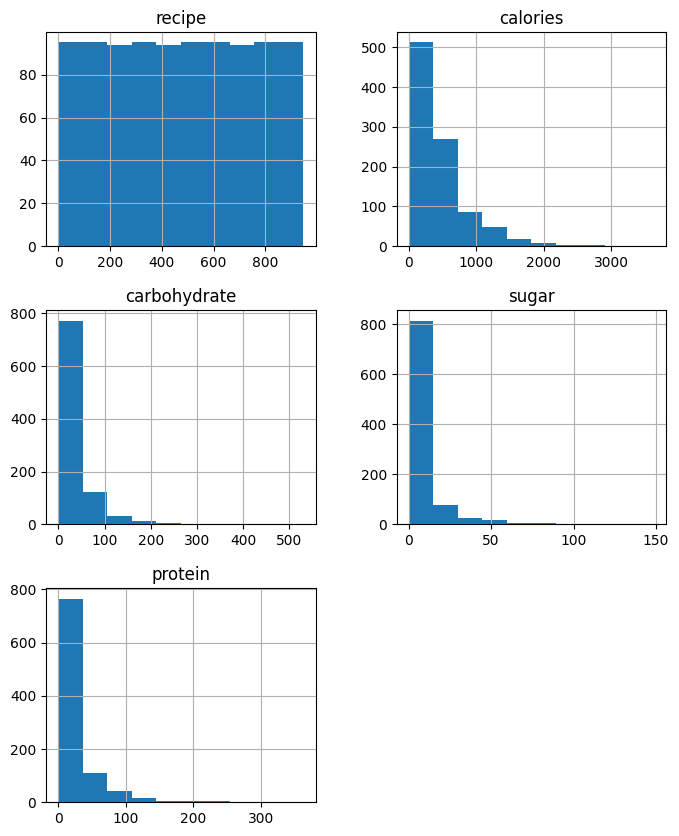

In [23]:
recipe_numeric.hist(figsize=(8,10))

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


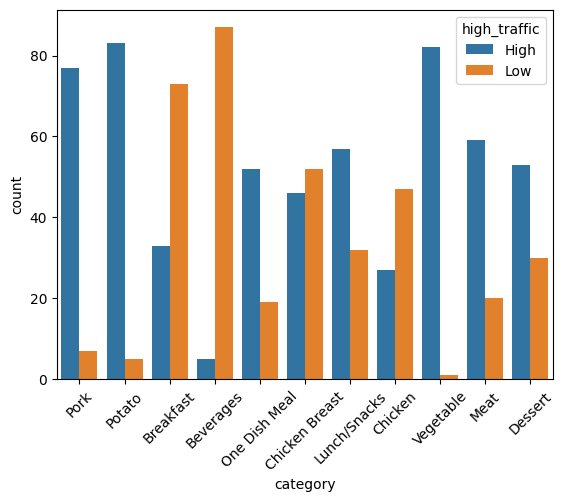

In [25]:
sns.countplot(data= recipe_df, x= 'category', hue='high_traffic')
plt.xticks(rotation= 45)
plt.show()

In [26]:
## For which Category there is high traffic
recipe_hightraffic = recipe_df[recipe_df["high_traffic"]=="High"]

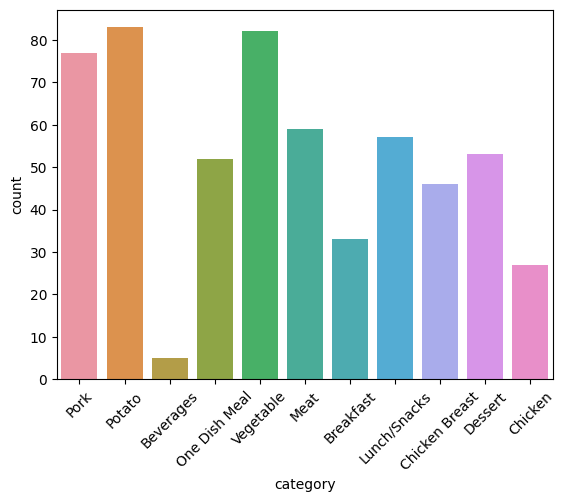

In [27]:
sns.countplot(data= recipe_hightraffic, x= 'category')
plt.xticks(rotation= 45)
plt.show()

# for potatoes, pork and vegetable. traffic is high 

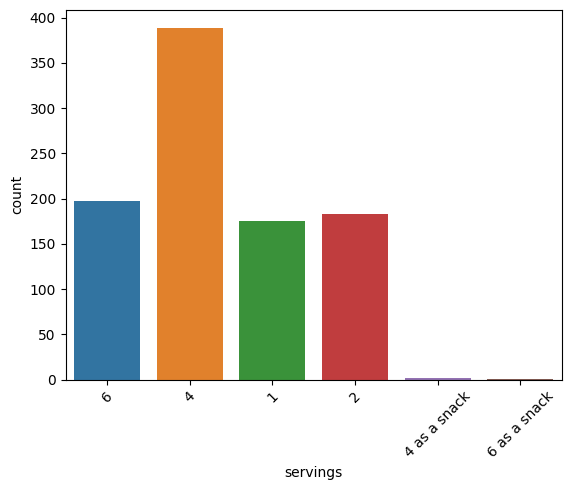

In [28]:
sns.countplot(data= recipe_df, x= 'servings')
plt.xticks(rotation= 45)
plt.show()

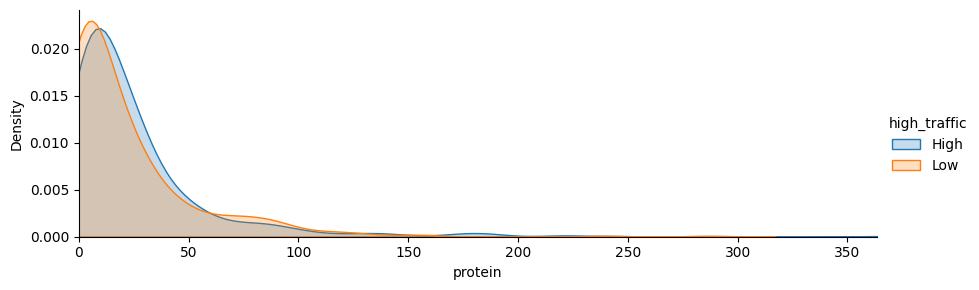

In [29]:
facet = sns.FacetGrid(recipe_df, hue="high_traffic",aspect=3)
facet.map(sns.kdeplot,"protein",shade= True)
facet.set(xlim=(0, recipe_df["protein"].max()))
facet.add_legend()
plt.show()

In [352]:
## Encoding the Traget variable i.e. high_traffic in binary form 
import numpy as np
recipe_df['high_traffic'] = np.where(recipe_df["high_traffic"]=='Low',0,1)

<AxesSubplot: >

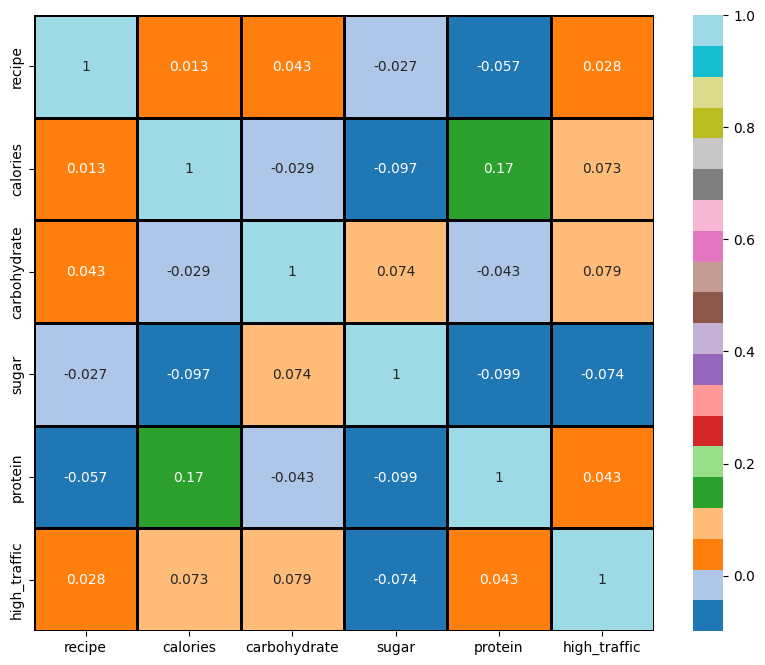

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(recipe_df.corr(), cmap='tab20', linewidth= 2, linecolor= 'black', annot= True)

#### From the above Correlation plot, we can see that Target variable doesnt have a strong relationship with feature set

<AxesSubplot: xlabel='high_traffic', ylabel='carbohydrate'>

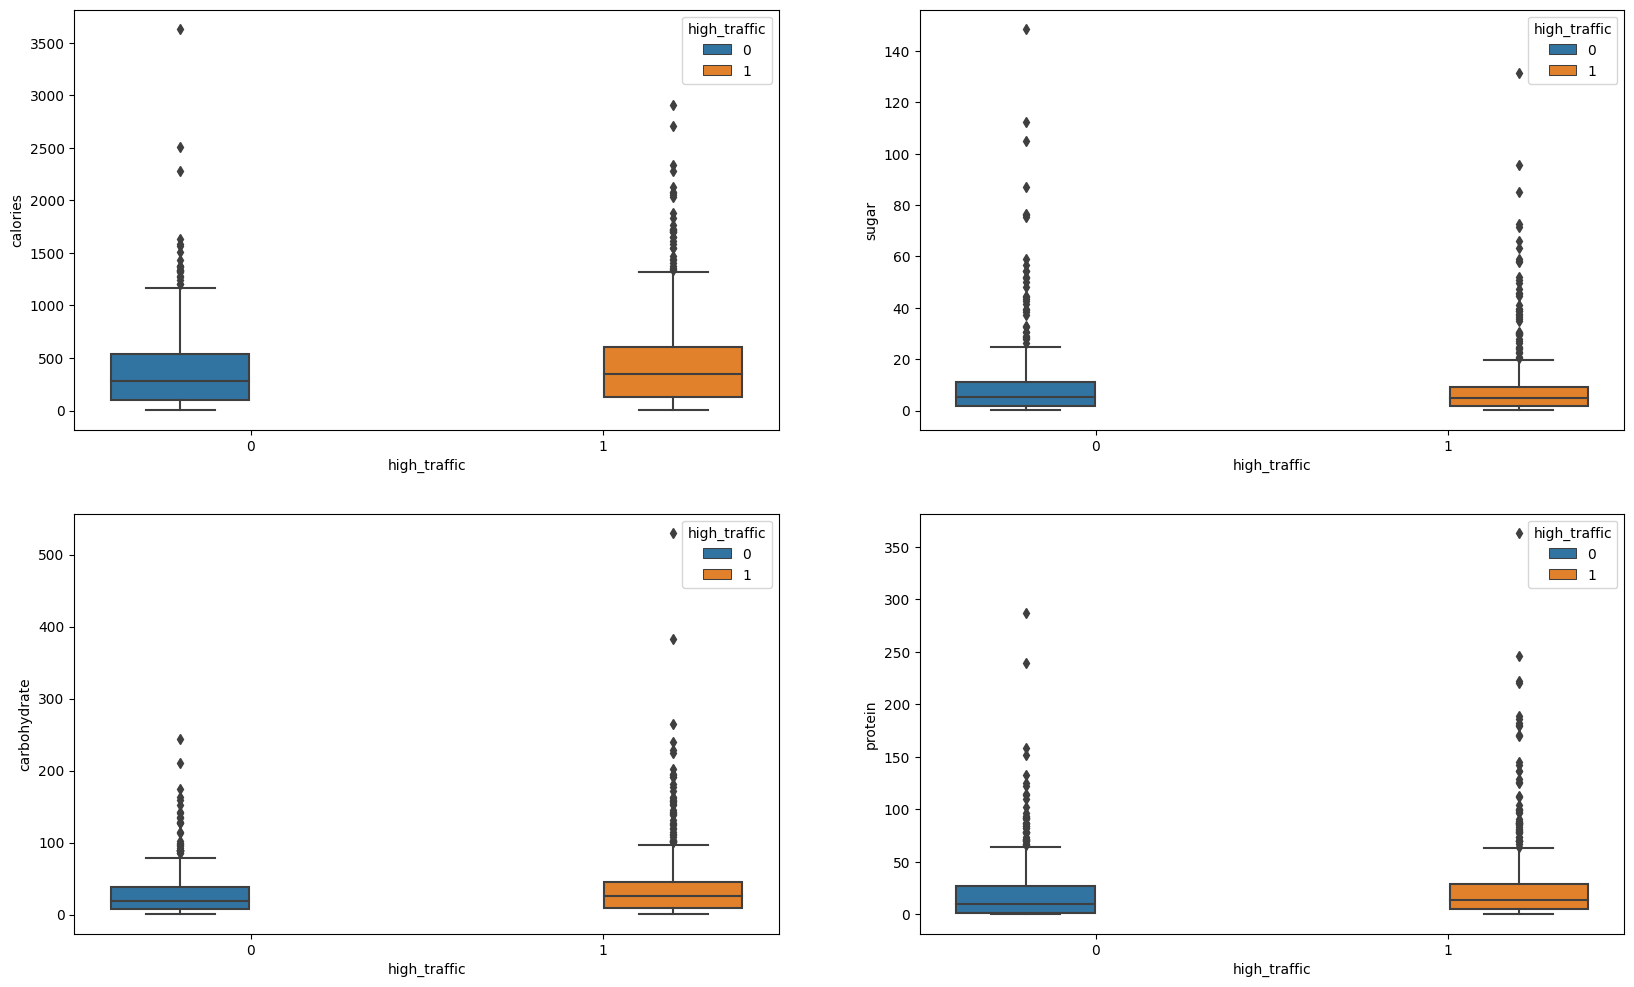

In [32]:
## Checking for outliers 

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='calories',x = 'high_traffic', hue = 'high_traffic',data = recipe_df, ax=axarr[0][0])
sns.boxplot(y='sugar',x = 'high_traffic', hue = 'high_traffic',data = recipe_df , ax=axarr[0][1])
sns.boxplot(y='protein',x = 'high_traffic', hue = 'high_traffic',data = recipe_df, ax=axarr[1][1])
sns.boxplot(y='carbohydrate',x = 'high_traffic', hue = 'high_traffic',data = recipe_df, ax=axarr[1][0])

In [349]:
# there are many outliers in the data. hence clamping the outliers

def outlier_func(i):
    
    q1= np.percentile(i, 25)
    q3= np.percentile(i,75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    
    return [lower, upper]

In [350]:
col= ["calories","sugar","protein","carbohydrate"]
for features in col:
    lower,upper = outlier_func(recipe_df[features])
    recipe_df[features]= recipe_df[features].clip(upper= upper, lower=lower, axis= 0)
    if np.any(recipe_df[features] > upper) or np.any(recipe_df[features] < lower):
        print(features,"yes")
    else:
        print(features, "no")
    
 

calories no
sugar no
protein no
carbohydrate no


## Target Class Imbalanced 

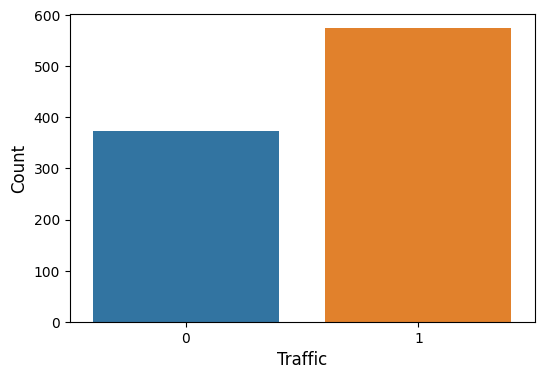

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(data= recipe_df, x= 'high_traffic')
plt.xlabel("Traffic", size= 12)
plt.ylabel("Count", size= 12)
plt.show()

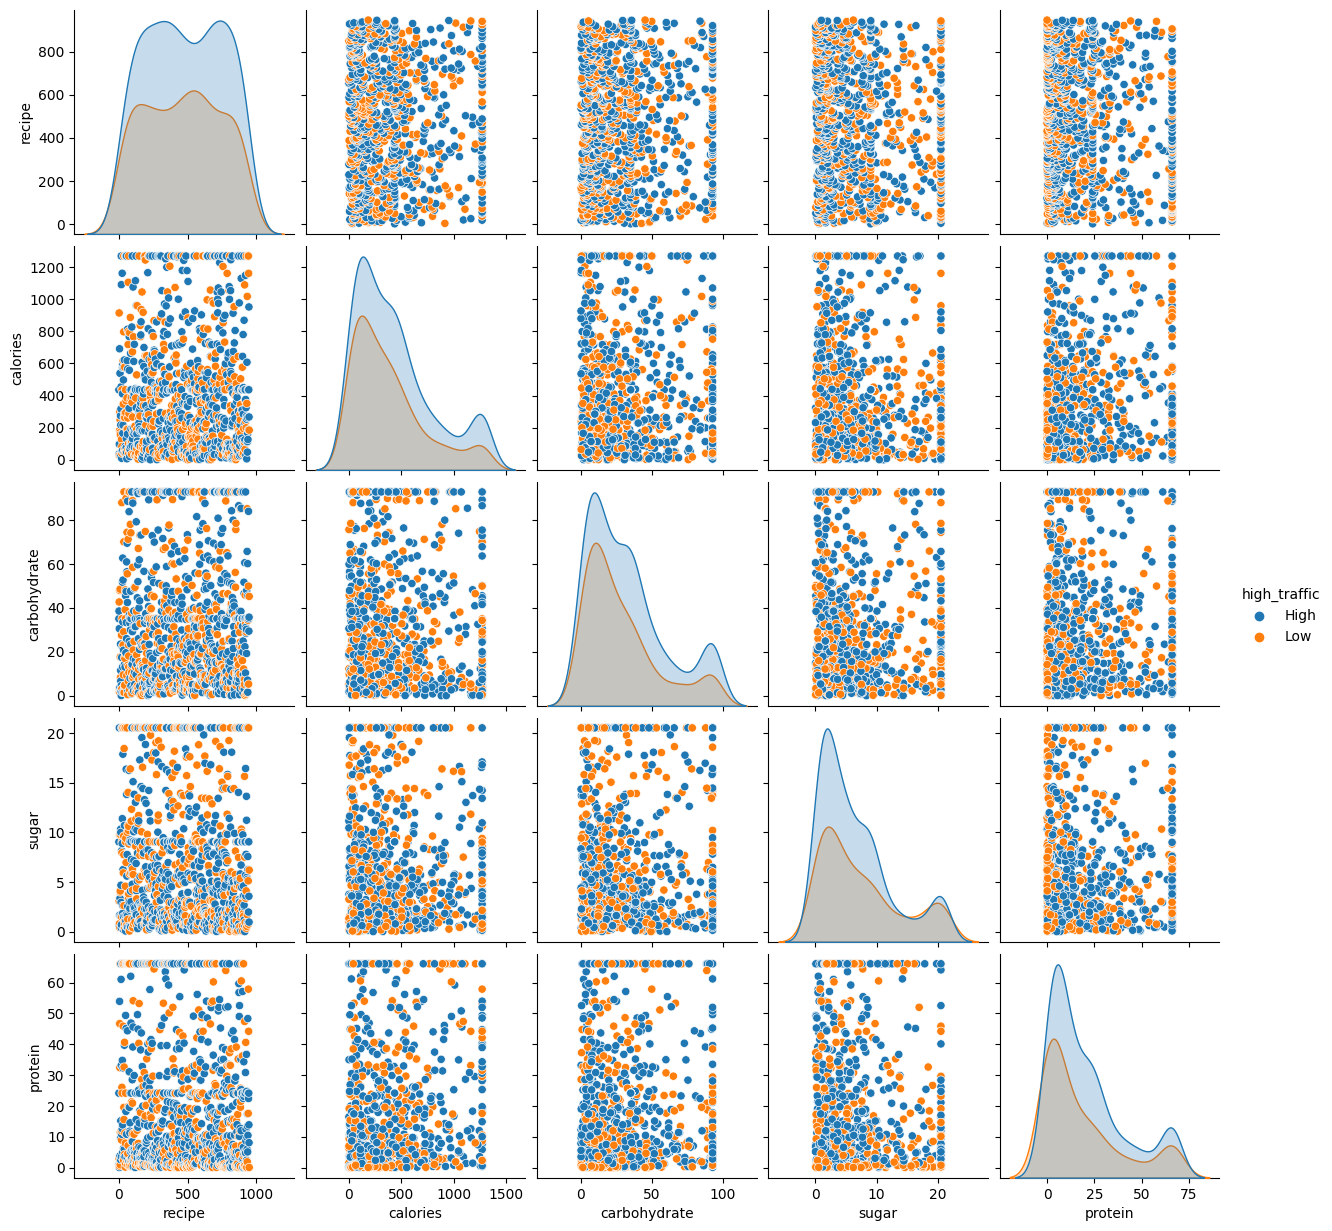

In [351]:
sns.pairplot(data= recipe_df, hue= "high_traffic")

#### Creating a new dataframe with additional calories, protein, sugar and carbohydrate values as per serving

In [353]:
recipe_df.head(2)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,435.939196,35.069676,9.046547,24.149296,Pork,6,1
1,2,35.480000,38.560000,0.660000,0.920000,Potato,4,1


In [354]:
recipe_df.recipe.nunique()
# cardinality of this is equal to the length of the dataset. This is not relevant in out model. Hence dropping it

recipe_df.drop('recipe', axis= 1, inplace=True)

In [355]:
nutritional = ['calories', 'carbohydrate', 'sugar', 'protein']
num_names = nutritional + ['servings']

nutritional_1 = ['calories_1', 'carbohydrate_1', 'sugar_1', 'protein_1']
num_names_1 = nutritional_1 + ['servings']

In [356]:
recipe_df2 = recipe_df[list(recipe_df)]

for name in nutritional: 
    recipe_df2[name] = recipe_df2[name].fillna(recipe_df.groupby(["category","servings"])[name].transform('mean'))
recipe_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      947 non-null    float64
 1   carbohydrate  947 non-null    float64
 2   sugar         947 non-null    float64
 3   protein       947 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ KB


In [357]:
recipe_df2['servings'] = recipe_df2['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int')
recipe_df2.groupby(['servings']).count()

,calories,carbohydrate,sugar,protein,category,high_traffic
servings,,,,,,
1,175,175,175,175,175,175
2,183,183,183,183,183,183
4,391,391,391,391,391,391
6,198,198,198,198,198,198


In [358]:
recipe_df2['category'] = recipe_df2['category'].replace({"Chicken Breast": 'Chicken'})
recipe_df2.groupby(['category']).count()

,calories,carbohydrate,sugar,protein,servings,high_traffic
category,,,,,,
Beverages,92,92,92,92,92,92
Breakfast,106,106,106,106,106,106
Chicken,172,172,172,172,172,172
Dessert,83,83,83,83,83,83
Lunch/Snacks,89,89,89,89,89,89
Meat,79,79,79,79,79,79
One Dish Meal,71,71,71,71,71,71
Pork,84,84,84,84,84,84
Potato,88,88,88,88,88,88


In [359]:
# added new columns: nutritional components in all servings, not per one

for name in nutritional:
    recipe_df2[name + '_1'] = recipe_df2[name] * recipe_df2['servings']

In [360]:
recipe_df2.describe()

,calories,carbohydrate,sugar,protein,servings,high_traffic,calories_1,carbohydrate_1,sugar_1,protein_1
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,411.428240,30.834095,6.834721,19.940774,3.477297,0.606125,1408.210249,105.509359,23.803618,67.207638
std,360.010129,27.046834,6.183370,20.587537,1.732741,0.488866,1521.467144,114.770478,26.295378,82.798868
min,0.140000,0.030000,0.010000,0.000000,1.000000,0.000000,0.280000,0.100000,0.060000,0.000000
25%,114.410000,9.135000,1.795000,3.465000,2.000000,0.000000,321.260000,24.250000,4.455000,9.610000
50%,313.530000,23.170000,5.050000,12.120000,4.000000,1.000000,831.840000,62.900000,14.000000,37.440000
75%,576.225000,42.590000,9.285000,28.530000,4.000000,1.000000,1908.100000,145.610000,35.280000,96.597184
max,1268.947500,92.772500,20.520000,66.127500,6.000000,1.000000,7613.685000,556.635000,123.120000,396.765000


## Feature Engineering

In [361]:
target = recipe_df2.pop('high_traffic')

In [362]:
recipe_df['servings'] = recipe_df['servings'].replace({"4 as a snack": '4', "6 as a snack": '6'}).astype('int')

In [394]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,LabelEncoder, StandardScaler
label = LabelEncoder()

In [374]:
recipe_df2['category']= label.fit_transform(recipe_df2['category'].values.reshape(-1,1))

In [375]:
# one hot encoding category and servings using sklearn one hot encoder 
# scaling the values to be in range between 0 and 1 using MinMaxScaler 

X= recipe_df2.iloc[:,4:].values
X #descriptive features


array([[7.00000000e+00, 6.00000000e+00, 2.61563517e+03, 2.10418056e+02,
        5.42792849e+01, 1.44895777e+02],
       [8.00000000e+00, 4.00000000e+00, 1.41920000e+02, 1.54240000e+02,
        2.64000000e+00, 3.68000000e+00],
       [1.00000000e+00, 1.00000000e+00, 9.14280000e+02, 4.26800000e+01,
        3.09000000e+00, 2.88000000e+00],
       ...,
       [7.00000000e+00, 2.00000000e+00, 1.90348000e+03, 5.88400000e+01,
        7.14000000e+00, 2.77400000e+01],
       [8.00000000e+00, 6.00000000e+00, 1.59966000e+03, 2.14620000e+02,
        5.82000000e+00, 4.84200000e+01],
       [0.00000000e+00, 4.00000000e+00, 7.38240000e+02, 1.80840000e+02,
        2.48000000e+01, 1.20000000e-01]])

In [377]:
Y= target.values
Y.shape

(947,)

In [395]:
scaler = MinMaxScaler()
scaler1 = StandardScaler()
 


In [396]:
X_preprocessed = scaler1.fit_transform(X)

print(X_preprocessed.shape)

(947, 6)


## Model Development

In [397]:
## splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, Y,test_size=0.3, random_state=32)

# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, y_train.shape)

(662, 6) (662,)


In [172]:
from sklearn.compose import ColumnTransformer,make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix, classification_report

from imblearn.pipeline import make_pipeline as imbl_pipe
from imblearn.over_sampling import SMOTE

#hyper-parameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix


### Here I will implement four different classifiers to select the model with best accuracy which is recall and precision is around 80%. Also, the gridsearch cv will be used to find best parameter. As the target class is imbalanced. so I have created a pipeline to first oversampled the data and trained it

#### Logistic Regression

In [301]:
lr_model = imbl_pipe(SMOTE(sampling_strategy='auto', random_state=32),LogisticRegression(random_state=32))

lr_model

Pipeline(steps=[('smote', SMOTE(random_state=32)),
                ('logisticregression', LogisticRegression(random_state=32))])

In [302]:
lr_param_grid = {'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
                 'logisticregression__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']} 
# Ridge Regularisation

lr_gridsearch = GridSearchCV(lr_model, lr_param_grid, verbose=3, cv= 3, scoring='accuracy')

In [115]:
lr_gridsearch

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=32))]),
             param_grid={'logisticregression__C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'logisticregression__solver': ['liblinear',
                                                        'newton-cg', 'lbfgs',
                                                        'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [303]:
lr_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.792 total time=   0.0s
[CV 2/3] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.747 total time=   0.0s
[CV 3/3] END logisticregression__C=0.01, logisticregression__solver=liblinear;, score=0.650 total time=   0.0s
[CV 1/3] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.783 total time=   0.0s
[CV 2/3] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.706 total time=   0.0s
[CV 3/3] END logisticregression__C=0.01, logisticregression__solver=newton-cg;, score=0.695 total time=   0.0s
[CV 1/3] END logisticregression__C=0.01, logisticregression__solver=lbfgs;, score=0.783 total time=   0.0s
[CV 2/3] END logisticregression__C=0.01, logisticregression__solver=lbfgs;, score=0.706 total time=   0.0s
[CV 3/3] END logisticregression__C=0.01, logisticregression

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=32))]),
             param_grid={'logisticregression__C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'logisticregression__solver': ['liblinear',
                                                        'newton-cg', 'lbfgs',
                                                        'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [304]:
print(lr_gridsearch.best_params_)

{'logisticregression__C': 5, 'logisticregression__solver': 'liblinear'}


In [305]:
print(lr_gridsearch.best_score_)

0.7431303990127519


#### Decision Tree Classifier

In [103]:
dt_model = imbl_pipe(SMOTE(sampling_strategy='auto', random_state=32),DecisionTreeClassifier(random_state=32))

dt_model

Pipeline(steps=[('smote', SMOTE(random_state=32)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=32))])

In [104]:
dt_param_grid = {
            'decisiontreeclassifier__max_leaf_nodes': [10, 20, 30], 
            'decisiontreeclassifier__min_samples_split': [3, 4],
            'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [4,6,8,10]
    
            }

dt_gridsearch = GridSearchCV(dt_model, dt_param_grid, verbose=3, cv= 5, scoring='accuracy', n_jobs=-1)

In [105]:
dt_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 5/5] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.705 total time=   0.0s
[CV 1/5] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=0.759 total time=   0.0s
[CV 2/5] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=0.684 total time=   0.0s
[CV 3/5] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=0.742 total time=   0.0s
[CV 4/5] END kneighborsclassifier__algorithm=brute, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=0.742 total time=  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=32))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [4, 6, 8, 10],
                         'decisiontreeclassifier__max_leaf_nodes': [10, 20, 30],
                         'decisiontreeclassifier__min_samples_split': [3, 4]},
             scoring='accuracy', verbose=3)

In [106]:
print(dt_gridsearch.best_params_)

{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_samples_split': 3}


In [107]:
print(dt_gridsearch.best_score_)

0.7370813397129186


#### Gradient Boosting Model 

In [87]:
gb_model = imbl_pipe(SMOTE(sampling_strategy='auto', random_state=32),GradientBoostingClassifier())

In [88]:
gb_param_grid = { 'gradientboostingclassifier__n_estimators' : [50, 100, 150,200],
                 'gradientboostingclassifier__learning_rate':[0.001,0.1,0.3,0.5,0.7],
                 'gradientboostingclassifier__max_depth' : [2,4,5],
                 'gradientboostingclassifier__criterion' : ['friedman_mse', 'squared_error', 'mse'],
                 'gradientboostingclassifier__min_samples_split' : [3, 4,5],
                'gradientboostingclassifier__max_features':[ 'sqrt', 'log2']
}
gb_gridsearch = GridSearchCV(gb_model, gb_param_grid, verbose=3, cv= 5, scoring='accuracy', n_jobs=-1)

In [89]:
gb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV 2/5] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_split=3, gradientboostingclassifier__n_estimators=50;, score=0.737 total time=   0.1s
[CV 3/5] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_split=3, gradientboostingclassifier__n_estimators=50;, score=0.712 total time=   0.0s
[CV 5/5] END gradientboostingclassifier__criterion=friedman_mse, gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_split=3, gradientboostingclassifier__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__criterion': ['friedman_mse',
                                                                   'squared_error',
                                                                   'mse'],
                         'gradientboostingclassifier__learning_rate': [0.001,
                                                                       0.1, 0.3,
                                                                       0.5,
                                                                       0.7],
                         'gradientboostingclassifier__max_depth': [2, 4, 5],
                         'gradientboostingclassifier__max_features': ['sqrt',
                                                                      'log2'],
                         'gradientboostingclassifier__min_samples_split': [3, 4,
                                                                           5],
                         'gradientboostingclassifier__n_estimators': [50, 100,
                                                                      150,
                                                                      200]},
             scoring='accuracy', verbose=3)

In [90]:
print(gb_gridsearch.best_params_)

{'gradientboostingclassifier__criterion': 'mse', 'gradientboostingclassifier__learning_rate': 0.001, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__max_features': 'sqrt', 'gradientboostingclassifier__min_samples_split': 3, 'gradientboostingclassifier__n_estimators': 50}


In [91]:
print(gb_gridsearch.best_score_)

0.7552175894281158


#### KNN Model

In [97]:
knn_model = imbl_pipe(SMOTE(sampling_strategy='auto', random_state=32),KNeighborsClassifier())

In [98]:
from sklearn.model_selection import GridSearchCV
kn_param_grid = {
    'kneighborsclassifier__n_neighbors' : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'kneighborsclassifier__weights' : ['uniform', 'distance'],
    'kneighborsclassifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'kneighborsclassifier__p' : [1,2]
}
knn_gridsearch = GridSearchCV(knn_model, kn_param_grid, verbose=3, cv= 5, scoring='accuracy', n_jobs=-1)

In [99]:
knn_gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7, 8,
                                                               9, 10, 11, 12,
                                                               13, 14, 15, 16,
                                                               17, 18, 19, 20],
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy', verbose=3)

In [100]:
knn_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.767 total time=   0.0s
[CV 3/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.705 total time=   0.0s
[CV 4/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.735 total time=   0.0s
[CV 5/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=uniform;, score=0.712 total time=   0.0s
[CV 1/5] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__n_neighbors=3, kneighborsclassifier__p=1, kneighborsclassifier__weights=distance;, score=0.737 total time=   0.0s
[CV 2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                         'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7, 8,
                                                               9, 10, 11, 12,
                                                               13, 14, 15, 16,
                                                               17, 18, 19, 20],
                         'kneighborsclassifier__p': [1, 2],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy', verbose=3)

In [101]:
print(knn_gridsearch.best_params_)

{'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform'}


In [102]:
print(knn_gridsearch.best_score_)

0.7462975620870358


####  Support Vector Classifier

In [108]:
svc_model = imbl_pipe(SMOTE(sampling_strategy='auto', random_state=32),SVC(random_state=32))

svc_model

Pipeline(steps=[('smote', SMOTE(random_state=32)),
                ('svc', SVC(random_state=32))])

In [109]:
param_grid = {'svc__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'svc__C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'svc__gamma': [1, 0.1, 0.01]}
svc_randomsearch = RandomizedSearchCV(svc_model, param_grid, verbose=3, cv= 5, n_jobs=-1, scoring='accuracy')

In [110]:
svc_randomsearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=6, decisiontreeclassifier__max_leaf_nodes=30, decisiontreeclassifier__min_samples_split=4;, score=0.662 total time=   0.0s
[CV 2/5] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=6, decisiontreeclassifier__max_leaf_nodes=30, decisiontreeclassifier__min_samples_split=4;, score=0.707 total time=   0.0s
[CV 3/5] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=6, decisiontreeclassifier__max_leaf_nodes=30, decisiontreeclassifier__min_samples_split=4;, score=0.720 total time=   0.0s
[CV 4/5] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=6, decisiontreeclassifier__max_leaf_nodes=30, decisiontreeclassifier__min_samples_split=4;, score=0.697 total time=   0.0s
[CV 5/5] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_dep

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE(random_state=32)),
                                             ('svc', SVC(random_state=32))]),
                   n_jobs=-1,
                   param_distributions={'svc__C': [0.0005, 0.001, 0.01, 0.1,
                                                   0.5],
                                        'svc__gamma': [1, 0.1, 0.01],
                                        'svc__kernel': ['linear', 'rbf', 'poly',
                                                        'sigmoid']},
                   scoring='accuracy', verbose=3)

In [111]:
print(svc_randomsearch.best_params_)

{'svc__kernel': 'sigmoid', 'svc__gamma': 0.1, 'svc__C': 0.5}


In [112]:
print(svc_randomsearch.best_score_)

0.7342333105491001


#### Although all five model gave best score in the same range, Logistic regression had highest accuracy. Therefore, implementing Logistic Regression Model and then SVC

## Model Evaluation

#### Logistic Regression with SMOTE

In [398]:
lr_clf= imbl_pipe(SMOTE(sampling_strategy='auto', random_state=32),
                  LogisticRegression(random_state=32,C= 0.001, penalty= 'l2'))

In [399]:
lr_clf= lr_clf.fit(X_train,y_train)

In [400]:
pred= lr_clf.predict(X_test)

In [401]:
print('accuracy of Logistic Regression:', round(lr_clf.score(X_test,y_test),2)*100 ,'%')

accuracy of Logistic Regression: 71.0 %


In [402]:
print('Precision:', round(precision_score(y_test, pred),2)*100 ,'%')
print('Recall:', round(recall_score(y_test, pred),2)*100 ,'%')
print('F1 Score:', round(f1_score(y_test, pred),2)*100 ,'%')

Precision: 85.0 %
Recall: 69.0 %
F1 Score: 76.0 %


In [403]:
print("Classification report:\n", classification_report(y_test, pred))


Classification report:
               precision    recall  f1-score   support

           0       0.56      0.76      0.64        97
           1       0.85      0.69      0.76       188

    accuracy                           0.71       285
   macro avg       0.70      0.72      0.70       285
weighted avg       0.75      0.71      0.72       285



#### As the target class is imbalanced but it contains majority value with 'High'. Hence trying the model without SMOTE(Oversampling).

In [415]:
lrclf2 = LogisticRegression(C=0.001, multi_class='multinomial', penalty="l2") # best parameters
lrclf2.fit(X_train, y_train)
y_pred_logreg = lrclf2.predict(X_test)


print("Classification report:\n", classification_report(y_test, y_pred_logreg))

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.26      0.39        97
           1       0.72      0.96      0.82       188

    accuracy                           0.72       285
   macro avg       0.75      0.61      0.60       285
weighted avg       0.74      0.72      0.67       285



In [416]:
print('accuracy of Logistic Regression:', round(lrclf2.score(X_test,y_test),2)*100 ,'%')

accuracy of Logistic Regression: 72.0 %


#### Linear SVC

In [404]:
from sklearn.svm import LinearSVC

In [405]:
svc_model = imbl_pipe(SMOTE(sampling_strategy='auto', random_state=32),LinearSVC(random_state=32,  C=0.01, loss='squared_hinge', penalty='l2'))

svc_model

Pipeline(steps=[('smote', SMOTE(random_state=32)),
                ('linearsvc', LinearSVC(C=0.01, random_state=32))])

In [406]:
svc_model.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=32)),
                ('linearsvc', LinearSVC(C=0.01, random_state=32))])

In [407]:
pred= svc_model.predict(X_test)

In [408]:
print("Classification report:\n", classification_report(y_test, pred))


Classification report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.66        97
           1       0.87      0.68      0.76       188

    accuracy                           0.72       285
   macro avg       0.72      0.74      0.71       285
weighted avg       0.77      0.72      0.73       285



### Conclusion:

Precision, Recall and F1 Score of High traffic by the Logistic Regression model(Without SMOTE) are 0.72, 0.96, 0.82, and by Linear Support Vector Classification model are 0.87, 0.70, 0.78. That means the Logistic Regression model fits the features better and has recall and F1 score more than 80%.

## Business Focus & Metrics
The business goals
There are 2 business goals:

to predict which recipes will be with high traffic;

to predict the "High" value of traffic of the recipes with 80% probability.

The Logistic Regression Model has achieved goals, because it has high rates of Precision, Recall and F1 Score more than 80%.

## Recommendations for Future

To help Product Manager predict the high traffic of the recipes, we can deploy this Linear SVC model into production. By implementing this model, about 81% of the prediction will make sure the traffic will be high. This will help Product Manager build their confidence in generating more traffic to the rest of the website.

To implement and improve the model, I will consider the following steps:

Looking for best ways to deploy this model in terms of performance and costs. The ideal way is to deploy this machine learning model on edge devices for its convenience and security and test the model in newly hired product analysts.
Collecting more data, e.g. time to make, cost per serving, ingredients, site duration time (how long users were at the recipe page), income links (from what sites users came to the recipe page), combinations of recipes (what recipes user visited at the same session with the current recipe).
Feature Engineering, e.g increase number of values in category, create more meaningful features from the variables.

In [424]:
n = 2  # n = 0, ..., len(X_test)
X_new = X_test[n]
y_pred_new = lrclf2.predict(X_new.reshape(-1,6))

if y_pred_new[0] == 1:
    print('The traffic is high')
else:
    print('The traffic is not high')

The traffic is high


## Performance of model using KPI
The company wants to increase an accuracy of prediction of high traffic. Therefore, we would consider using accuracy of predictions which predicted high traffic as a KPI to compare 2 models again. The higher the percentage, the better the model performs. The Logistic Regression model has 76% of the accuracy whereas the accuracy of Linear SVC model is lower (74%).

In [427]:
# accuracy score on the train data
from sklearn.metrics import accuracy_score
X_train_pred = lrclf2.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = lrclf2.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

In [428]:
# accuracy score on the train data
X_train_pred = svc_model.predict(X_train)
print('Accuracy score of the train data: ', accuracy_score(X_train_pred, y_train))

# accuracy score on the test data
X_test_pred = svc_model.predict(X_test)
print('Accuracy score of the test data: ', accuracy_score(X_test_pred, y_test))

Accuracy score of the train data:  0.7326283987915407
Accuracy score of the test data:  0.7228070175438597


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation